In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [8]:
titanic=pd.read_csv('titanic_cleaned.csv')
titanic.head()

X = pd.get_dummies(X, drop_first=True)
y = titanic['Survived']

X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [9]:
tahmin_modeli = LogisticRegression()
tahmin_modeli.fit(X_eğitim, y_eğitim)

tahmin_eğitim = tahmin_modeli.predict(X_eğitim)
tahmin_test = tahmin_modeli.predict(X_test)

In [12]:
test_ihtimal =tahmin_modeli.predict_proba(X_test)[:,1] #1 proba

We created our model with Logistic regression. Now we can see the error matrix with the confusion_matrix function in the metrics module of the scikit-learn library. It will be sufficient to write the actual and predicted values as parameters to this function.

In [13]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [14]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[381  55]
 [ 77 199]]
Hata Matrisi (Test verileri)
------------------------------
[[99 14]
 [20 46]]


In [15]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 99
Doğru pozitif sayısı   : 46
Yanlış pozitif sayısı  : 14
Yanlış negatif sayısı  : 20


# **Metrics from the Confusion Matrix**

**1.1. Doğruluk (Accuracy)**

In [16]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  tahmin_modeli.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.8100558659217877
Hesaplanan doğruluk değeri      :  0.8100558659217877
accuracy_score() değeri         :  0.8100558659217877


**1.2. Hata Oranı (Error Rate)**

In [17]:
print("Hesaplanan hata oranı değeri      : ",  (FN + FP)/(FN + FP + TN + TP))
print("hata oranı değeri         : ",  1-accuracy_score(y_test, tahmin_test))

Hesaplanan hata oranı değeri      :  0.18994413407821228
hata oranı değeri         :  0.1899441340782123


**1.3. Hassasiyet (Precision)**

In [18]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.7666666666666667
precision_score() değeri        :  0.7666666666666667


**1.4.Duyarlılık (Recall/Sensitivity)**

In [19]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8761061946902655


**1.5. Özgünlük (Specificity)**

In [20]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8761061946902655


**1.6. F1 (F1 Score)**

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.7301587301587302
f1_score() değeri     :  0.7301587301587302


In [26]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test))) #best score


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       113
           1       0.77      0.70      0.73        66

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

f1_score() değeri        : 0.73
recall_score() değeri    : 0.70
precision_score() değeri : 0.77


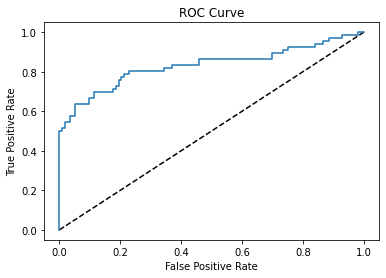

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
tahmin_test_ihtimal = tahmin_modeli.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()